In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [6]:
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
species_count = df['species'].value_counts()
print(species_count)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Create histograms for each numeric feature: sepal length, sepal width, petal length, and petal width

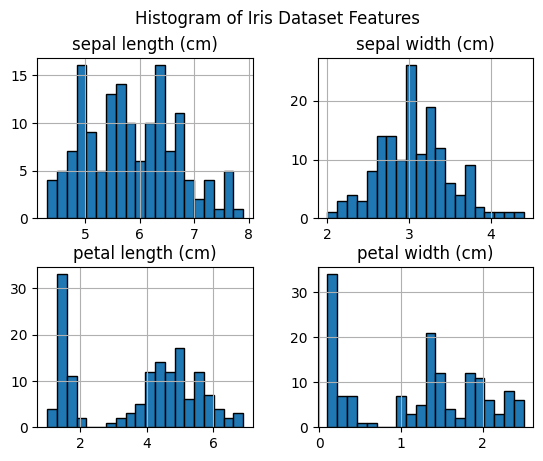

In [16]:
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
df[features].hist(bins=20, edgecolor='black')
plt.suptitle('Histogram of Iris Dataset Features')
plt.show()

Generate a pair plot (scatter plot matrix) to visualize the relationships between the features. Use different colors for each species.

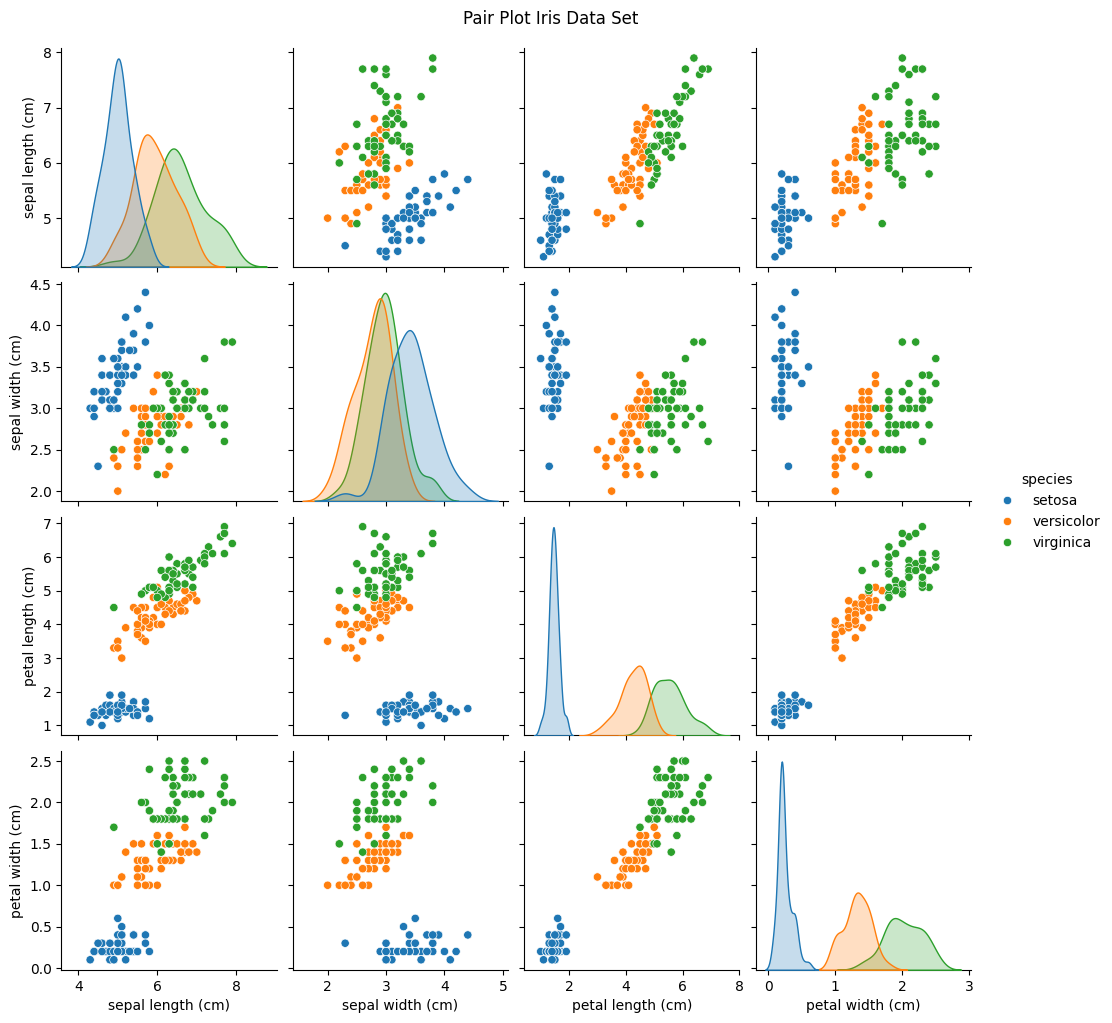

In [24]:
sns.pairplot(df,hue='species')
plt.suptitle('Pair Plot Iris Data Set', y=1.02)
plt.show()

Create box plots to compare the distributions of sepal length, sepal width, petal length, and petal width across different species.

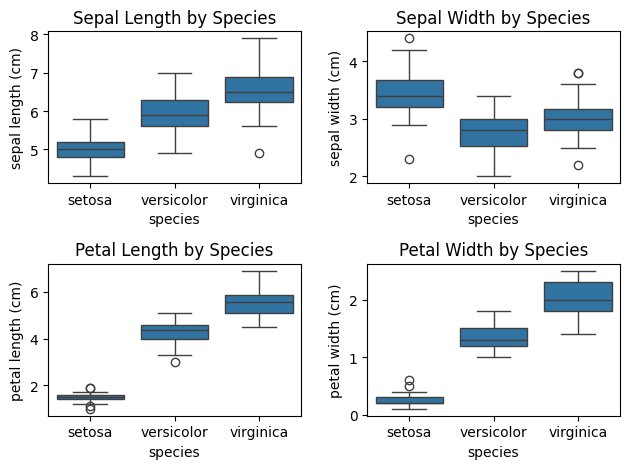

In [30]:
fig, axes = plt.subplots(2,2)

sns.boxplot(x='species', y='sepal length (cm)',data=df,ax=axes[0,0])
axes[0,0].set_title('Sepal Length by Species')

sns.boxplot(x='species',y='sepal width (cm)',data=df,ax=axes[0,1])
axes[0,1].set_title('Sepal Width by Species')

sns.boxplot(x='species',y='petal length (cm)',data=df,ax=axes[1,0])
axes[1,0].set_title('Petal Length by Species')

sns.boxplot(x='species',y='petal width (cm)',data=df,ax=axes[1,1])
axes[1,1].set_title('Petal Width by Species')

plt.tight_layout()
plt.show()

Generate a scatter plot matrix to visualize the feature relationships with different colors for each species

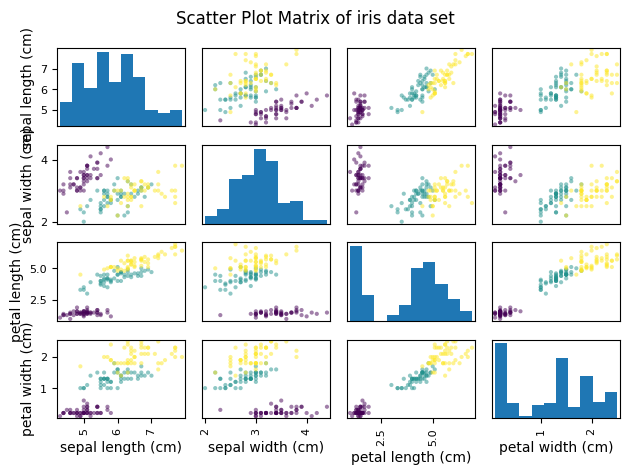

In [33]:
pd.plotting.scatter_matrix(df[features + ['species']],c=df['species'].astype('category').cat.codes, cmap='viridis')
plt.suptitle('Scatter Plot Matrix of iris data set')
plt.tight_layout()
plt.show()

Calculate the correlation matrix of the numeric features in the dataset.

In [34]:
corr_matrix = df[features].corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


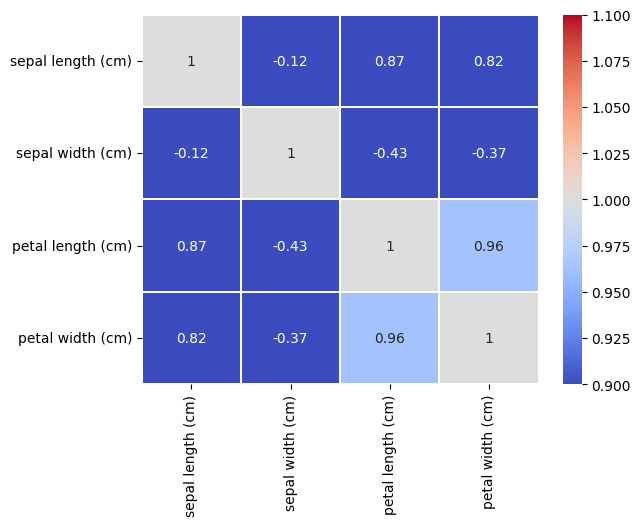

In [46]:
sns.heatmap(data=corr_matrix, annot=True,cmap='coolwarm',vmin=1,vmax=1,linewidths=0.3)
plt.show()